<a href="https://colab.research.google.com/github/hdighidy/Classification-Projects/blob/main/Classify_images_of_clothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

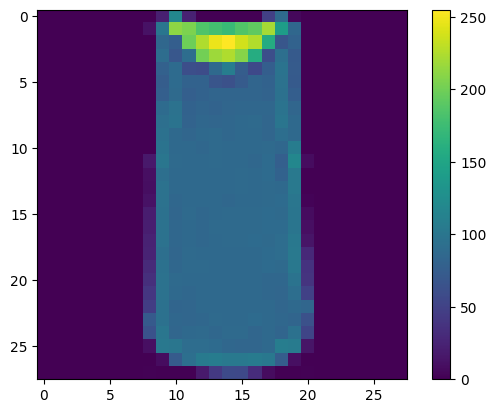

In [12]:
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
train_images = train_images / 255.0

test_images = test_images / 255.0

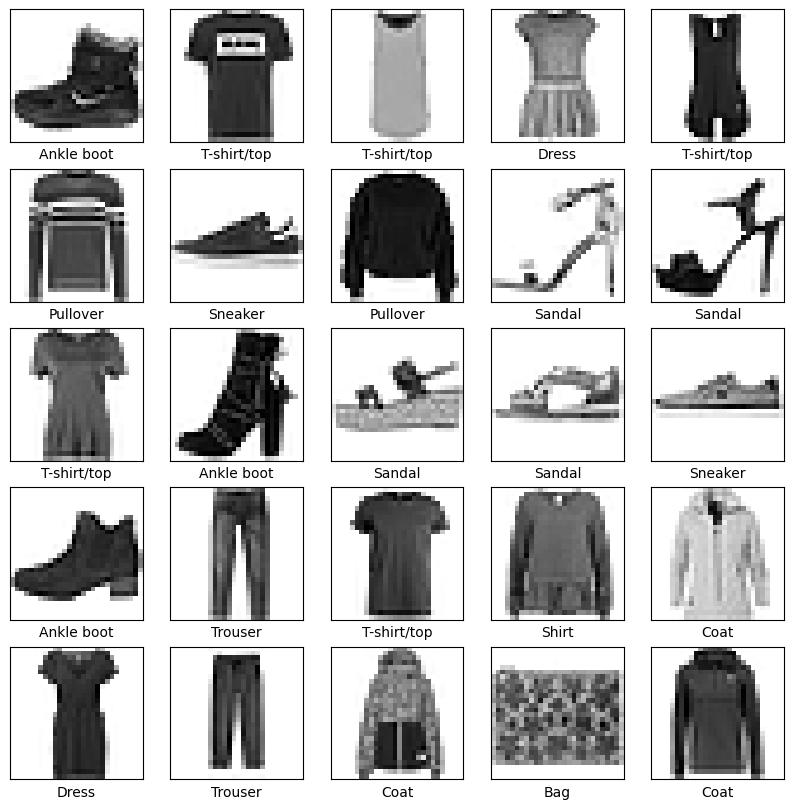

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary) # cm.binary for color map gray scale black and white
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Model

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5017 - accuracy: 0.8249
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3761 - accuracy: 0.8647
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3343 - accuracy: 0.8784
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3123 - accuracy: 0.8849
Epoch 5/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2945 - accuracy: 0.8911
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2803 - accuracy: 0.8954
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2677 - accuracy: 0.9006
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2544 - accuracy: 0.9045
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2459 - accuracy: 0.9075
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.23

## Model Evaluation

In [23]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

#print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3896 - accuracy: 0.8832 - 681ms/epoch - 2ms/step


In [24]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [25]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [26]:
predictions[0]

array([1.3122344e-13, 4.0197788e-13, 1.8705343e-12, 1.3699239e-10,
       2.5763249e-14, 1.6610818e-06, 1.4129933e-12, 8.8679874e-03,
       2.7876651e-10, 9.9113035e-01], dtype=float32)

In [27]:
np.argmax(predictions[0])

9

In [28]:
test_labels[0]

9

In [29]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

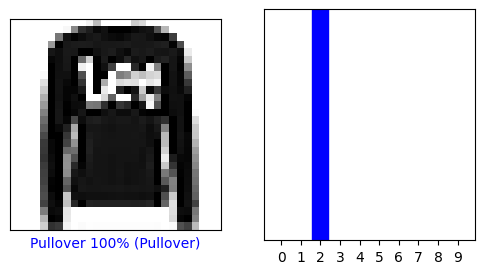

In [31]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

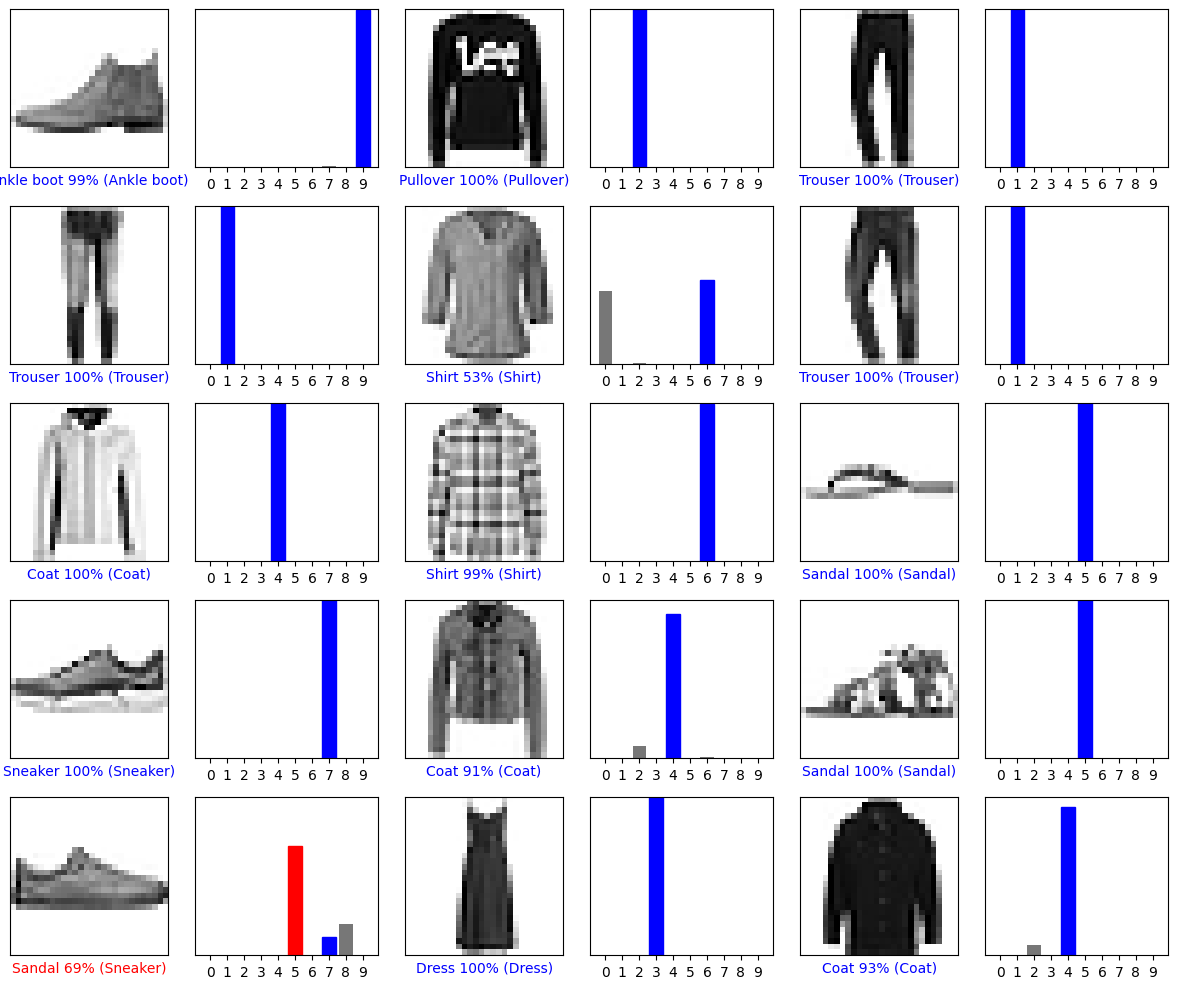

In [32]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()